In [2]:
import glob, os
import itertools

folder_clean = 'D:\\Atom\\python\\data\\cleaned\\grill\\final'
folder_outdoor = 'D:\\Atom\\python\\data\\cleaned\\grill\\outdoor'

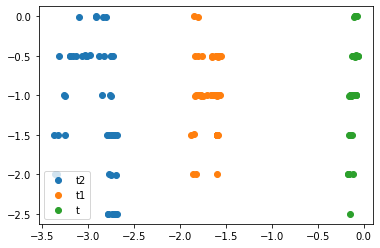

In [2]:
p_f = pd.read_csv(os.path.join(folder_clean, 'd10_water_f_kde.csv'))
p_t2 = pd.read_csv(os.path.join(folder_clean, 'd10_water_t2_kde.csv'))
p_t1 = pd.read_csv(os.path.join(folder_clean, 'd10_water_t1_kde.csv'))
p_t = pd.read_csv(os.path.join(folder_clean, 'd10_water_t_kde.csv'))

plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t2['PHASE']), p_f['RSSI'] - p_t2['RSSI'])
plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t1['PHASE']), p_f['RSSI'] - p_t1['RSSI'])
plt.scatter(np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE']), p_f['RSSI'] - p_t['RSSI'])

plt.legend(['t2', 't1', 't', '6'])

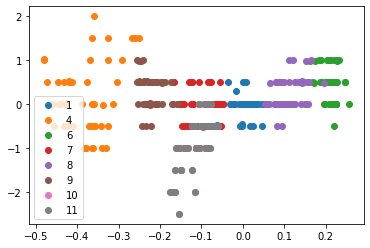

In [19]:
ds = [1, 3, 4, 6, 7, 8, 9, 10, 11]
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_water_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_water_t_kde.csv' % d))
    plt.scatter(np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE']), df_h['RSSI'] - df_t['RSSI'])
plt.legend(ds)

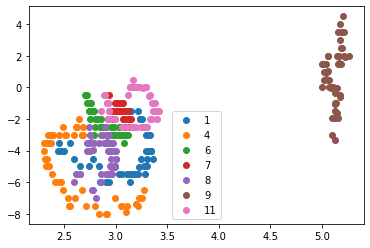

In [22]:
ds = [1, 4, 6, 7, 8, 9, 11]
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_oil_f_kde.csv' % d))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_oil_t_kde.csv' % d))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
    phase_diff[phase_diff < 0] += 2*np.pi
    plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
plt.legend(ds)

## d9实验室和d4桌子上，瓶子都是摆在桌子上，特征是否相似
d7是正常悬空放。

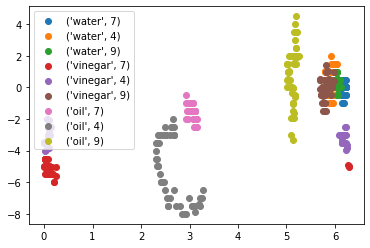

In [10]:
matls = ['water', 'vinegar', 'oil']
ds = [7, 4, 9]
for matl in matls:
    for d in ds:     
        p_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        p_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
        phase_diff = np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE'])
        phase_diff[phase_diff < 0] += 2*np.pi
        plt.scatter(phase_diff, p_f['RSSI'] - p_t['RSSI'])
plt.legend(list(itertools.product(matls, ds))) 

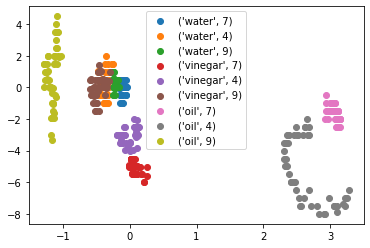

In [19]:
matls = ['water', 'vinegar', 'oil']
ds = [7, 4, 9]
for matl in matls:
    for d in ds:     
        p_f = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
        p_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
        phase_diff = np.unwrap(p_f['PHASE']) - np.unwrap(p_t['PHASE'])
        plt.scatter(phase_diff, p_f['RSSI'] - p_t['RSSI'])
plt.legend(list(itertools.product(matls, ds))) 

对水来说，的确相似，水的特征总是这么好，在什么情况下都很相似，油和醋在两个环境下并不存在相似性，lab的空瓶没有采数据

## 是否距离越近，特征簇的半径越小？

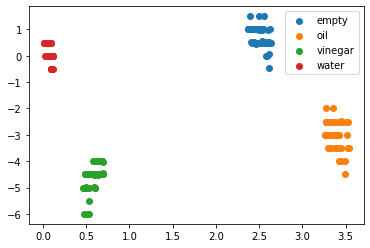

In [17]:
matls = ['empty', 'oil', 'vinegar', 'water']
for matl in matls:
    df_h = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % matl))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' % matl))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
    phase_diff[phase_diff < 0] += 2*np.pi
    plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
plt.legend(matls)

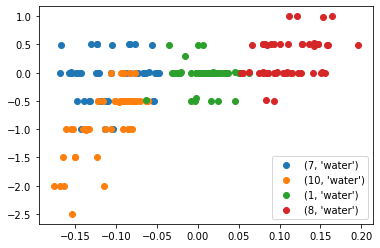

In [27]:
ds = [7, 10, 1, 8]
# matls = ['empty', 'oil', 'vinegar', 'water']
matl = 'water'
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#         phase_diff[phase_diff < 0] += 2*np.pi
    plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
plt.legend(list(itertools.product(ds, matls)))

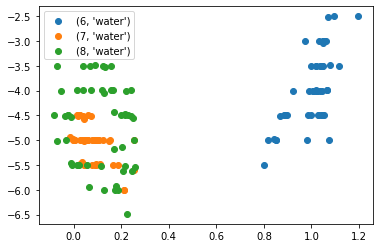

In [33]:
ds = [6, 7, 8]
# matls = ['empty', 'oil', 'vinegar', 'water']
matl = 'vinegar'
for d in ds:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#     phase_diff[phase_diff < 0] += 2*np.pi
    plt.scatter(phase_diff, df_h['RSSI'] - df_t['RSSI'])
plt.legend(list(itertools.product(ds, matls)))

不存在距离越近，半径越小的特征，簇是在偏移，而非缩放

## 频率响应形状是否相似

是


### 相位差的频率响应

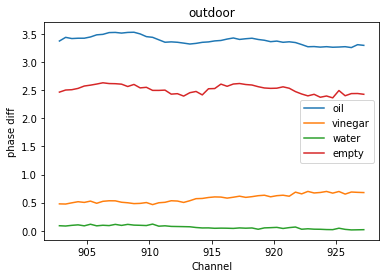

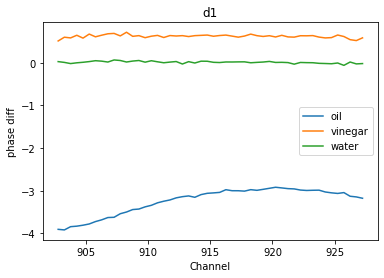

In [20]:
matls = ['oil', 'vinegar', 'water', 'empty']

plt.figure(1)
for matl in matls:
    df_h = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % matl))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' % matl))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
    phase_diff[phase_diff < 0] += 2 * np.pi
    plt.plot(df_h['CHANNEL'], phase_diff)
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title('outdoor')
plt.legend(matls)

plt.figure(2)
for matl in ['oil', 'vinegar', 'water']:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (1, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (1, matl)))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
#     phase_diff[phase_diff < 0] += 2 * np.pi
    plt.plot(df_h['CHANNEL'], phase_diff)
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title('d1')
plt.legend(matls)

### RSSI差的频率响应

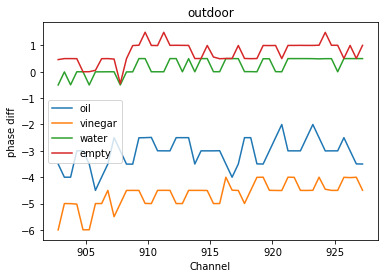

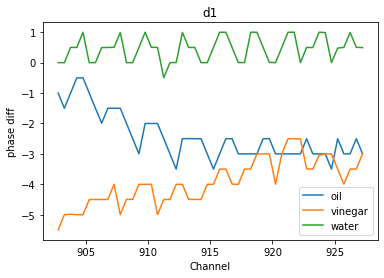

In [26]:
matls = ['oil', 'vinegar', 'water', 'empty']
plt.figure(1)
for matl in matls:
    df_h = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % matl))
    df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' % matl))
    phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
    phase_diff[phase_diff < 0] += 2 * np.pi
    plt.plot(df_h['CHANNEL'], df_h['RSSI'] - df_t['RSSI'])
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title('outdoor')
plt.legend(matls)

plt.figure(2)
for matl in ['oil', 'vinegar', 'water']:
    df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (6, matl)))
    df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (6, matl)))
    plt.plot(df_h['CHANNEL'], df_h['RSSI'] - df_t['RSSI'])
plt.xlabel('Channel')
plt.ylabel('phase diff')
plt.title('d1')
plt.legend(matls)

### 频率响应的波动是哪来的？

Text(0, 0.5, 'RSSI DIFF')

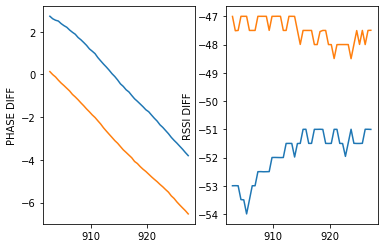

In [77]:
d = 8
matl = 'oil'

df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))

plt.subplot(121)
plt.plot(df_h['CHANNEL'], np.unwrap(df_h['PHASE']))
plt.plot(df_t['CHANNEL'], np.unwrap(df_t['PHASE']))
phase_diff = np.unwrap(df_h['PHASE']) - np.unwrap(df_t['PHASE'])
phase_diff[phase_diff < 0] += 2 * np.pi
# plt.plot(df_h['CHANNEL'], phase_diff)
plt.ylabel('PHASE DIFF')


plt.subplot(122)
plt.plot(df_h['CHANNEL'], df_h['RSSI'])
plt.plot(df_t['CHANNEL'], df_t['RSSI'])
# plt.plot(df_h['CHANNEL'], df_h['RSSI'] - df_t['RSSI'])
plt.ylabel('RSSI DIFF')

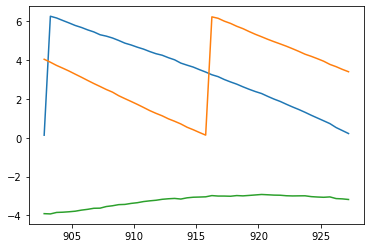

In [42]:
d = 1
matl = 'oil'

df_h = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_f_kde.csv' % (d, matl)))
df_t = pd.read_csv(os.path.join(folder_clean, 'd%d_%s_t_kde.csv' % (d, matl)))


plt.plot(df_h['CHANNEL'], df_h['PHASE'])
plt.plot(df_t['CHANNEL'], df_t['PHASE'])

plt.plot(df_t['CHANNEL'], np.unwrap(df_h['PHASE'] - df_t['PHASE']))


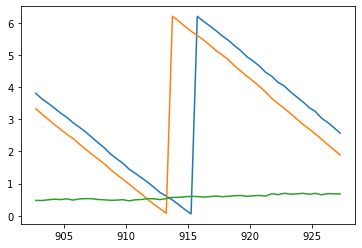

In [46]:
d = 1
matl = 'vinegar'

df_h = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_front_kde_outdoor.csv' % matl))
df_t = pd.read_csv(os.path.join(folder_outdoor, 'outdoor_d1_%s_tail_kde_outdoor.csv' % matl))


plt.plot(df_h['CHANNEL'], df_h['PHASE'])
plt.plot(df_t['CHANNEL'], df_t['PHASE'])

plt.plot(df_t['CHANNEL'], np.unwrap(df_h['PHASE'] - df_t['PHASE']))